In [1]:
import tensorflow as tf   

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [6]:
model.fit(x_train, y_train, epochs = 5)

model.evaluate(x_test, y_test, verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 2s 929us/step - loss: 0.2990 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 2s 924us/step - loss: 0.1436 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 2s 919us/step - loss: 0.1066 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 2s 901us/step - loss: 0.0873 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 2s 884us/step - loss: 0.0729 - accuracy: 0.9772
313/313 - 0s - loss: 0.0715 - accuracy: 0.9777


[0.07149869203567505, 0.9776999950408936]

In [1]:
import tensorflow as tf  
# Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小。
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt  
print(tf.__version__)

2.4.0-dev20200921


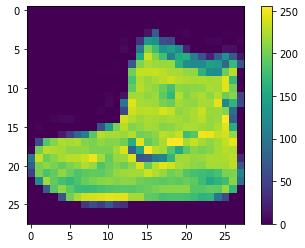

Epoch 1/10
1875/1875 [==============================] - 2s 927us/step - loss: 3.4414 - accuracy: 0.6860
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7189 - accuracy: 0.7335
Epoch 3/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.6536 - accuracy: 0.7468
Epoch 4/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.6087 - accuracy: 0.7685
Epoch 5/10
1875/1875 [==============================] - 2s 926us/step - loss: 0.5962 - accuracy: 0.7781
Epoch 6/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.5455 - accuracy: 0.8082
Epoch 7/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.5290 - accuracy: 0.8203
Epoch 8/10
1875/1875 [==============================] - 2s 926us/step - loss: 0.5191 - accuracy: 0.8271
Epoch 9/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.5081 - accuracy: 0.8313
Epoch 10/10
1875/1875 [==============================] - 2s 926us/

In [27]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
model.fit(train_images, train_labels, epochs = 10)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = False)
print('\nTest accuracy:', test_acc)

In [31]:
probability_model = tf.keras.Sequential([
    model, tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)
predictions[0]

array([4.7931519e-28, 1.5658242e-16, 0.0000000e+00, 5.6632321e-18,
       0.0000000e+00, 3.9151052e-04, 3.0743331e-37, 5.8196341e-03,
       1.8774790e-14, 9.9378890e-01], dtype=float32)

In [33]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

print('Training entries: {}, labels: {}'.format(len(train_data), len(train_labels)))

# 电影评论可能具有不同的长度。由于神经网络的输入必须是统一的长度，我们稍后需要解决这个问题。
len(train_data[0]), len(train_data[1])

Training entries: 25000, labels: 25000


(218, 189)

In [42]:
# 一个映射单词到整数索引的词典
word_index = imdb.get_word_index()
# print(word_index)
word_index = {k:(v+3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>']  = 3

reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()] )

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

train_data = keras.preprocessing.sequence.pad_sequences(
    train_data,
    value = word_index['<PAD>'],
    padding = 'post',
    maxlen  = 256
)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, value = word_index['<PAD>'], padding = 'post', maxlen = 256 )

len(train_data[0]), len(train_data[1])

vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = 'relu')) # 16个隐层单元的全连接层
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

# model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(
    partial_x_train, partial_y_train, epochs = 40, batch_size = 512, validation_data = (x_val, y_val), verbose = 1
)

results = model.evaluate(test_data, test_labels, verbose = 2)
print(results)



Epoch 1/40
30/30 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.5530 - val_loss: 0.6898 - val_accuracy: 0.6301
Epoch 2/40
30/30 [==============================] - 0s 6ms/step - loss: 0.6855 - accuracy: 0.6959 - val_loss: 0.6808 - val_accuracy: 0.7374
Epoch 3/40
30/30 [==============================] - 0s 6ms/step - loss: 0.6717 - accuracy: 0.7566 - val_loss: 0.6637 - val_accuracy: 0.7493
Epoch 4/40
30/30 [==============================] - 0s 6ms/step - loss: 0.6480 - accuracy: 0.7692 - val_loss: 0.6369 - val_accuracy: 0.7669
Epoch 5/40
30/30 [==============================] - 0s 6ms/step - loss: 0.6134 - accuracy: 0.7925 - val_loss: 0.6013 - val_accuracy: 0.7847
Epoch 6/40
30/30 [==============================] - 0s 6ms/step - loss: 0.5706 - accuracy: 0.8102 - val_loss: 0.5600 - val_accuracy: 0.8028
Epoch 7/40
30/30 [==============================] - 0s 6ms/step - loss: 0.5234 - accuracy: 0.8303 - val_loss: 0.5170 - val_accuracy: 0.8109
Epoch 8/40
30/30 [==

In [43]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt  


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
import pathlib

import matplotlib.pyplot as plt  
import pandas as pd  
# import seaborn  as sns 

import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import layers

dataset_path = keras.utils.get_file('auto-mpg.data', 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values = '?', comment = '\t', sep = ' ', skipinitialspace = True)

dataset = raw_dataset.copy()
dataset.tail()  # 尾巴五行

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [35]:
# dataset.isna().sum
dataset = dataset.dropna()
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0


In [36]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()

train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [37]:
from tensorflow import keras
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end = '')
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose = 0,
    callbacks = [PrintDot()]
)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________

....................................................................................................
....................................................................................................
....................................................................................................
.............................................................................

In [55]:
29*64+65*64+65*64+65

10241

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.376459,1.055548,2.376459,9.007545,2.350559,9.007545,995
996,2.453015,1.082945,2.453015,8.407624,2.193858,8.407624,996
997,2.349281,1.054355,2.349281,8.543108,2.285853,8.543108,997
998,2.285392,1.018008,2.285392,8.996835,2.275212,8.996835,998
999,2.456367,1.048548,2.456367,8.721250,2.228268,8.721250,999


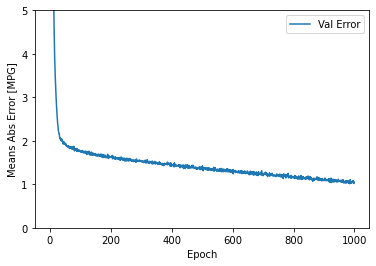

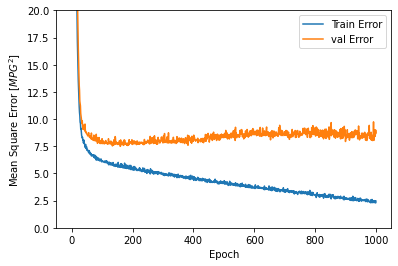

In [39]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Means Abs Error [MPG]')
    plt.plot(hist['epoch'],hist['mae'], label = 'Val Error')
    plt.ylim([0, 5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'val Error')
    plt.ylim([0, 20])
    plt.legend()
    plt.show()
plot_history(history)



....................................................................................................
..................

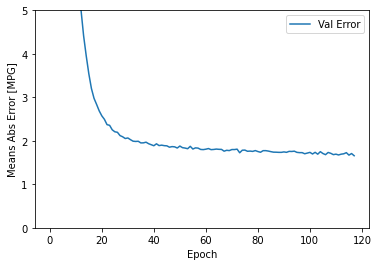

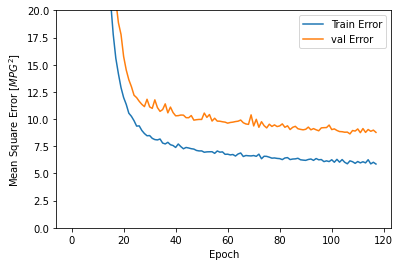

3/3 - 0s - loss: 5.6409 - mae: 1.8067 - mse: 5.6409
Testing set Mean Abs Error:  1.81 MPG


In [40]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(normed_train_data, train_labels, epochs = EPOCHS, validation_split = 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])   #需要输入的是list类型的数据，所以通常情况只用EarlyStopping的话也要是[EarlyStopping()]

plot_history(history)

lose, mae, mse = model.evaluate(normed_test_data, test_labels, verbose = 2)
print('Testing set Mean Abs Error: {:5.2f} MPG'.format(mae))
# 5.2f  结果总长是五位数（注意小数点也算一位数长），就是小数点前两个数字，不足就用空格表示，小数点后保留两位，不足四舍五入！

In [17]:
import os 

import tensorflow as tf    
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28*28) / 255.0
test_images = test_images[:1000].reshape(-1, 28*28) / 255.0

def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(512, activation = 'relu', input_shape = (784, )),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10)
    ])
    model.compile(optimizer = 'adam',
                   loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
                   metrics = ['accuracy'])
    return model

model = create_model()
model.summary()

checkpoint_path = 'training_1/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_weights_only = True, verbose = 1)

model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels), callbacks = [cp_callback])

model = create_model()
loss, acc = model.evaluate(test_images, test_labels, verbose = 2)
print('Untrained model, accuracy: {:5.2f}%'.format(100*acc))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 1/32 [..............................] - ETA: 0s - loss: 2.3397 - accuracy: 0.1875
Epoch 00001: saving model to training_1/cp.ckpt
32/32 [==============================] - 0s 5ms/step - loss: 1.1543 - accuracy: 0.6640 - val_loss: 0.7502 - val_accuracy: 0.7610
Epoch 2/10
 1/32 [..............................] - ETA: 0s - loss: 0.6025 - accuracy: 0.7812
Epoch 00002: 

In [18]:
model.load_weights(checkpoint_path)

loss, acc = model.evaluate(test_images, test_labels, verbose = 2)
print('Restored model, accuracy:{:5.2f}%'.format(100*acc))

32/32 - 0s - loss: 0.4012 - accuracy: 0.8800
Restored model, accuracy:88.00%


In [19]:
checkpoint_path = 'training_2/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    period = 5  #训练一个新模型，每五个 epochs 保存一次唯一命名的 checkpoint 
)

model = create_model()
model.save_weights(checkpoint_path.format(epoch = 0))
model.fit(
    train_images,
    train_labels,
    epochs = 50,
    callbacks = [cp_callback],
    validation_data = (test_images, test_labels),
    verbose = 0
)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [5]:
# 泰坦尼克号乘客的数据。模型会根据乘客的年龄、性别、票务舱和是否独自旅行等特征来 预测乘客生还的可能性。
import functools
import numpy as np  
import tensorflow as tf  
import tensorflow_datasets as tfds   

TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file('train.csv', TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file('eval.csv', TEST_DATA_URL)

np.set_printoptions(precision = 3, suppress = True)
# dataset = tf.data.experimental.make_csv_dataset(
#      ...,
#      column_names = CSV_COLUMNS,  # 第一行不包含列名，那么需要将列名通过字符串列表传给column_names
#      select_columns = columns_to_use, # 忽略数据集中的某些列, 只使用需要的列
#      ...)
LABEL_COLUMN = 'survived'
LABELS = [0,1]

def get_dataset(file_path):
    dataset = tf.data.experimental.make_csv_dataset(
        file_path,
        batch_size = 12,
        label_name = LABEL_COLUMN,
        na_value = '?',
        num_epochs = 1,
        ignore_errors = True
    )
    return dataset 
raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)
# dataset 中的每个条目都是一个批次，用一个元组（多个样本，多个标签）表示。
# 样本中的数据组织形式是以列为主的张量（而不是以行为主的张量），每条数据中包含的元素个数就是批次大小
# examples, labels = next(iter(raw_train_data))
# print('EXAMPLES:\n', examples, '\n')
# print('LABELS: \n', labels)

CATEGORIES = {
    'sex':['male', 'female'],
    'class':['First', 'Second', 'Thrid'],
    'deck':['A','B','C','D','E','F','G','H','I','J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}
categorical_columns = []
for feature, vocab in CATEGORIES.items():
    cat_col = tf.feature_column.categorical_column_with_vocabulary_list(key = feature, vocabulary_list = vocab)
    categorical_columns.append(tf.feature_column.indicator_column(cat_col))
# categorical_columns
# 连续数据标准化。
def process_continuous_data(mean, data):
    data = tf.cast(data, tf.float32)*1/(2*mean)
    return tf.reshape(data, [-1, 1])

MEANS = {
    'age': 29.631308,
    'n_siblings_spouses':0.545455,
    'parch':0.379585,
    'fare':34.385399
}

numerical_columns = []
for feature in MEANS.keys():
    num_col = tf.feature_column.numeric_column(feature, normalizer_fn = functools.partial(process_continuous_data, MEANS[feature]))
    numerical_columns.append(num_col)
# numerical_columns

preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns + numerical_columns)

model = tf.keras.Sequential([
    preprocessing_layer,
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

train_data = raw_train_data.shuffle(500)
test_data = raw_test_data

model.fit(train_data, epochs = 20)
# model.summary()
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

# model.predict 

Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
53/53 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.7512
Epoch 2/20
53/53 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7990
Epoch 3/20
53/53 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8166
Epoch 4/20
53/53 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8198
Epoch 5/20
53/53 [==============================] - 0s 981us/step - loss: 0.4098 - accuracy: 0.8150
Epoch 6/20
53/53 [==============================] - 0s 979us/step - loss: 0.3927 - accuracy: 0.8246
Epoch 7/20
53/53 [==============================] - 0s 956us/step - loss: 0.3893 - accuracy: 0.8373
Epoch 8/20
53/53 [==============================] - 0s 936us/step - loss: 0.3852 - accuracy: 0.8421
Epoch 9/20
53/53 [==============================] - 0s 943us/step - loss: 0.3758 - accuracy: 0.845

In [7]:
# keras 加载 numpy
import numpy as np       
import tensorflow as tf  
import tensorflow_datasets as tfds   

DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
    train_examples = data['x_train']
    train_labels = data['y_train']
    test_examples = data['x_test']
    test_labels = data['y_test']

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.RMSprop(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(train_dataset, epochs = 10)
model.summary()

Epoch 1/10
938/938 [==============================] - 1s 1ms/step - loss: 3.4993 - sparse_categorical_accuracy: 0.8698
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.5661 - sparse_categorical_accuracy: 0.9237
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.4147 - sparse_categorical_accuracy: 0.9435
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3382 - sparse_categorical_accuracy: 0.9535
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3065 - sparse_categorical_accuracy: 0.9596
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2697 - sparse_categorical_accuracy: 0.9662
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2529 - sparse_categorical_accuracy: 0.9679
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2378 - sparse_categorical_accuracy: 0.9706
Epoch 9/10
938/938 [============================

In [4]:
# 使用 tf.data 加载文本数据
import tensorflow as tf      
import tensorflow_datasets as tfds        
import os   

DIRECTORY_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
FILE_NAMES = ['cowper.txt', 'derby.txt', 'butler.txt']

for name in FILE_NAMES:
    text_dir = tf.keras.utils.get_file(name, origin = DIRECTORY_URL + name)

parent_dir = os.path.dirname(text_dir)
# parent_dir
def labeler(example, index):
    return example, tf.cast(index, tf.int64)

labeled_data_sets = []
for i, file_name in enumerate(FILE_NAMES):
    lines_dataset = tf.data.TextLineDataset(os.path.join(parent_dir, file_name))
    labeled_dataset = lines_dataset.map(lambda ex: labeler(ex, i))
    labeled_data_sets.append(labeled_dataset)

BUFFER_SIZE = 50000
BATCH_SIZE = 64
TAKE_SIZE = 5000

all_labeled_data = labeled_data_sets[0]
for labeled_dataset in labeled_data_sets[1:]:
    all_labeled_data = all_labeled_data.concatenate(labeled_dataset)

all_labeled_data = all_labeled_data.shuffle(
    BUFFER_SIZE, reshuffle_each_iteration = False
)
for ex in all_labeled_data.take(5):
  print(ex)

tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
for text_tensor, _ in all_labeled_data:
    some_tokens = tokenizer.tokenize(text_tensor.numpy())
    vocabulary_set.update(some_tokens)

vocab_size = len(vocabulary_set)
# vocab_size
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)
example_text = next(iter(all_labeled_data))[0].numpy()
# print(example_text)

encoded_example = encoder.encode(example_text)
# print(encoded_example)
def encode(text_tensor,label):
    encoded_text = encoder.encode(text_tensor.numpy())
    return encoded_text, label
def encode_map_fn(text, label):
    encoded_text, label = tf.py_function(encode, inp = [text, label], Tout = (tf.int64, tf.int64))
    encoded_text.set_shape([None])

    return encoded_text, label

all_encoded_data = all_labeled_data.map(encode_map_fn)

train_data = all_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)

test_data = all_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

sample_text, sample_labels = next(iter(test_data))
sample_text[0], sample_labels[0]

vocab_size += 1
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 64))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for units in [64, 64]:
    model.add(tf.keras.layers.Dense(units, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_data, epochs = 3, validation_data = test_data)
eval_loss, eval_acc = model.evaluate(test_data)


(<tf.Tensor: shape=(), dtype=string, numpy=b"So, bootless hurl'd, though by no feeble hand,">, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'The dove-destroyer falcon, down he flew.'>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'of such honour. I have honour from Jove himself, which will abide with'>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'Lest in resentment of this hasty course'>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'With a sufficient force will bear her thence,'>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


ValueError: You must set the `padded_shapes` argument to `Dataset.padded_batch` if any component of its input has an unknown rank

In [19]:
# 预创建的 Estimators
import tensorflow as tf         
import pandas as pd          

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength','PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names = CSV_COLUMN_NAMES, header = 0)
test = pd.read_csv(test_path, names = CSV_COLUMN_NAMES, header = 0)

# train.head()
train_y = train.pop('Species')
test_y = test.pop('Species')

def input_evaluate_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
                'SepalWidth':  np.array([2.8, 2.3]),
                'PetalLength': np.array([5.6, 3.3]),
                'PetalWidth':  np.array([2.2, 1.0])}
    labels = np.array([2,1])
    return features, labels

def input_fn(features, labels, training = True, batch_size = 256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)
# dataset = tf.data.Dataset.from_tensor_slices(x)
# dataset = dataset.shuffle(2)  # 将数据打乱，数值越大，混乱程度越大
# dataset = dataset.batch(4)  # 按照顺序取出4行数据，最后一次输出可能小于batch
# dataset = dataset.repeat()  # 数据集重复了指定次数
# repeat()在batch操作输出完毕后再执行,若在之前，相当于先把整个数据集复制两次
#为了配合输出次数，一般默认repeat()空
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key = key))
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,
    hidden_units = [30, 10],
    n_classes = 3
)
classifier.train(
    input_fn = lambda:input_fn(train, train_y, training = True),
    steps = 5000
)

eval_result = classifier.evaluate(
    input_fn = lambda:input_fn(test, test_y, training = False)
)
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

expected = ['Setosa','Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}
def input_fn(features, batch_size = 256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predictions = classifier.predict(
    input_fn = lambda: input_fn(predict_x))
for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%), expected "{}"'.format(
        SPECIES[class_id], 100 * probability, expec))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpe8ncjubi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

In [2]:
# BERT
import os  
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub   
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from official.modeling import tf_utils
from official import nlp 
from official.nlp import bert

import official.nlp.optimization
import official.nlp.bert.bert_models  
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization
import official.nlp.data.classifier_data_lib
import official.nlp.modeling.losses
import official.nlp.modeling.models
import official.nlp.modeling.networks

import json

# gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/keras_bert/uncased_L-24_H-1024_A-16"
# hub_url_bert = "https://hub.tensorflow.google.cn/tensorflow/bert_en_uncased_L-12_H-768_A-12/2"
# tf.io.gfile.listdir(hub_url_bert)

# glue, info = tfds.load('glue/mrpc', with_info = True, batch_size = -1)
'''
tokenizer = bert.tokenization.FullTokenizer(
    vocab_file = os.path.join(gs_folder_bert, 'vocab.txt'),
    do_lower_case = True
)
tokens = tokenizer.tokenize('hello tensorflow!')
id = tokenizer.convert_tokens_to_ids(tokens)

tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])

def encode_sentence(s):
    tokens = list(tokenizer.tokenize(s.numpy()))
    tokens.append('[SEP]')
    return tokenizer.convert_tokens_to_ids(tokens)

sentence1 = tf.ragged.constant([
    encode_sentence(s) for s in glue_train['sentence1']
])
sentence2 = tf.ragged.constant([
    encode_sentence(s) for s in glue_train['sentence2']
])

cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*sentence1.shape[0]
input_word_ids = tf.concat([cls, sentence1, sentence2], axis = -1)
_ = plt.pcolormesh(input_word_ids.to_tensor())

input_mask = tf.ones_like(input_word_ids).to_tensor()

type_cls = tf.zeros_like(cls)
type_s1 = tf.zeros_like(sentence1)
type_s2 = tf.ones_like(sentence2)
input_type_ids =tf.concat([type_cls, type_s1, type_s2], axis = -1).to_tensor()
'''

"\ntokenizer = bert.tokenization.FullTokenizer(\n    vocab_file = os.path.join(gs_folder_bert, 'vocab.txt'),\n    do_lower_case = True\n)\ntokens = tokenizer.tokenize('hello tensorflow!')\nid = tokenizer.convert_tokens_to_ids(tokens)\n\ntokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]'])\n\ndef encode_sentence(s):\n    tokens = list(tokenizer.tokenize(s.numpy()))\n    tokens.append('[SEP]')\n    return tokenizer.convert_tokens_to_ids(tokens)\n\nsentence1 = tf.ragged.constant([\n    encode_sentence(s) for s in glue_train['sentence1']\n])\nsentence2 = tf.ragged.constant([\n    encode_sentence(s) for s in glue_train['sentence2']\n])\n\ncls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*sentence1.shape[0]\ninput_word_ids = tf.concat([cls, sentence1, sentence2], axis = -1)\n_ = plt.pcolormesh(input_word_ids.to_tensor())\n\ninput_mask = tf.ones_like(input_word_ids).to_tensor()\n\ntype_cls = tf.zeros_like(cls)\ntype_s1 = tf.zeros_like(sentence1)\ntype_s2 = tf.ones_like(sentence2)\ninput_type_

In [1]:
# text classification with TF hub 
import numpy as np
import tensorflow as tf  

import tensorflow_hub as hub
import tensorflow_datasets as tfds   

print(tfds.__version__)
print(tf.executing_eagerly())
print(hub.__version__)
print("CPU is", "available" if tf.config.experimental.list_physical_devices("CPU") else "NOT AVAILABLE")

train_data, validation_data, test_data = tfds.load(
    name = 'imdb_reviews',
    split = ('train[:60%]','train[60%:]','test'),
    as_supervised = True
)

3.0.0
True
0.8.0
CPU is NOT AVAILABLE


Shuffling and writing examples to /home/bigdata-al/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHZXCH3/imdb_reviews-train.tfrecord


Shuffling and writing examples to /home/bigdata-al/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHZXCH3/imdb_reviews-test.tfrecord


Shuffling and writing examples to /home/bigdata-al/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHZXCH3/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /home/bigdata-al/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [11]:
import warnings
warnings.filterwarnings('ignore')

train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
# train_examples_batch
embedding = "https://hub.tensorflow.google.cn/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(
    embedding, input_shape = [], dtype = tf.string, trainable = True
)
# hub_layer(train_examples_batch[:3])
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])
# model.add(hub_layer)
# model.add(tf.keras.layers.Dense(16, activation = 'relu'))
# model.add(tf.keras.layers.Dense(1))
# model.summary()
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    metrics = ['accuracy']
)
history = model.fit(
    train_data.shuffle(10000).batch(512),
    epochs = 20,
    validation_data = validation_data.batch(512),
    verbose = 0
)
results = model.evaluate(test_data.batch(512), verbose = 2)
for name, value in zip(model.metrics_names, results):
    print('%s: %.3f' % (name, value))

49/49 - 1s - loss: 0.3265 - accuracy: 0.8528
loss: 0.326
accuracy: 0.853


In [5]:
from bert import modeling

ModuleNotFoundError: No module named 'bert'